# Laboratory Lab02 – SLURM part 1
**Author: Bartłomiej Jamiołkowski**

In this Jupyter Notebook, I am presenting solved Assignment 2.

## Assignment 2 - Data Analysis based on the Yelp dataset

Running an interactive job using the command attached below. I don’t need GPU, so I use the plgrid-now partition to get a fast node allocation.

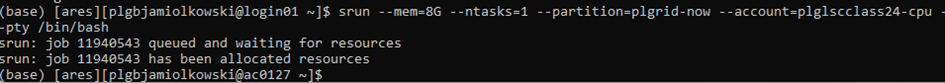

Activating a python virtual environment prepared on the shared group storage.

Coppying Yelp dataset to my SCRATCH storage. 

Checking to see if the mentioned dataset has been successfully copied to my SCRATCH storage.

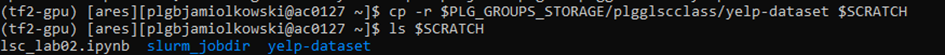

Configuring an environment (python virtenv) on my SCRATCH storage. 

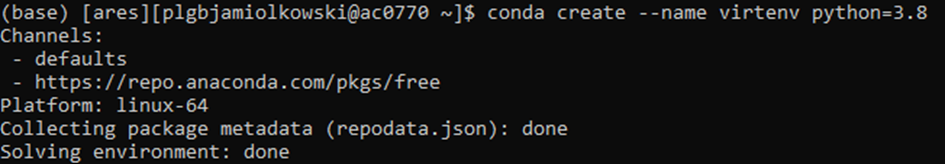

Checking to see if the environment called virtenv has been successfully configured on my SCRATCH storage.

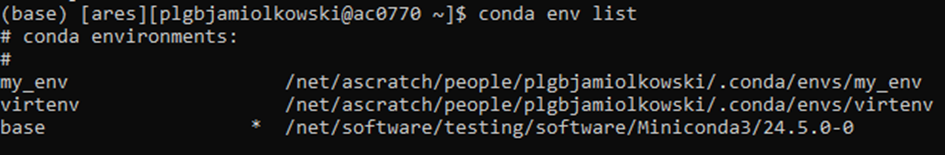

Activating virtenv and installing: Pandas, Matplotlib and Jupyter.

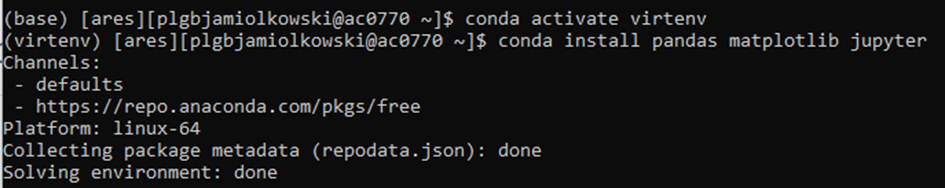

Meanwhile, I started jupyter.

Opening the folder containing the Yelp dataset and creating a new Jupyter Notebook called 'data_analysis.ipynb.

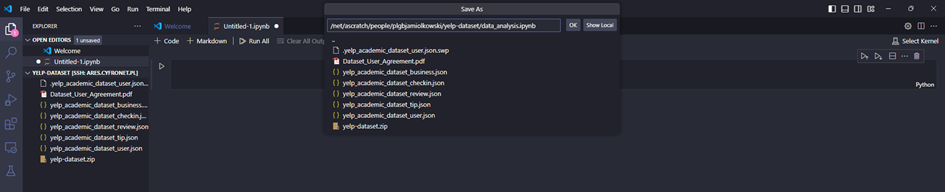

Pasting the Jupyter connection URL that was printed earlier.

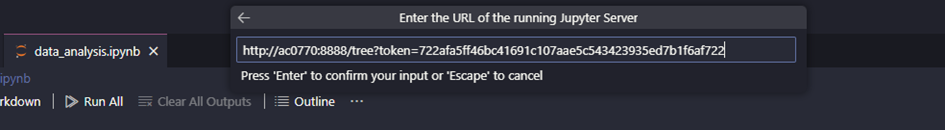

At this point, I assume that I need to perform a simple data analysis (a small example) to verify whether all the previous steps have been successfully completed. I am using the notebooks available on Kaggle, as suggested in the instructions.

Importing libraries.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Importing the data (chunksize returns jsonReader for iteration). I decided to focuse on analysis of Vegetarian Restaurants available in Business dataset.

In [3]:
businesses_data = pd.read_json("/net/ascratch/people/plgbjamiolkowski/yelp-dataset/yelp_academic_dataset_business.json", lines=True, orient='columns', chunksize=100000)

In [4]:
for business in businesses_data:
    subset_business_data = business
    break

Displaying the first few rows of the subset of the Yelp business dataset.

In [5]:
display(subset_business_data.head(4))

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."


The most popular businesses in the dataset are restaurants; therefore, I will narrow down this analysis to focus on restaurants. First, I will filter all the restaurants from the dataset.

In [6]:
all_cities = subset_business_data[subset_business_data['categories'].str.contains('Rest.*')==True]
df_rest = pd.Series(all_cities['categories']).str.get_dummies(',')
df_rest.drop(["Restaurants", " Restaurants", "Food", " Food"], axis=1, inplace=True)
df_rest.columns = df_rest.columns.str.lstrip()
all_rest = df_rest.groupby(by=df_rest.columns, axis=1).sum()

In [7]:
# Extracting name of all the cities
from_business = all_cities[['city']]

In [8]:
# Getting count of Vegetarian restaurants in each city
all_rest.join(from_business).groupby('city').sum()['Vegetarian'].sort_values(ascending=False)

city
Philadelphia    138
New Orleans      48
Tampa            44
Nashville        41
Tucson           40
               ... 
Inglewood         0
Ivyland           0
Jamison           0
Jefferson         0
wimauma           0
Name: Vegetarian, Length: 813, dtype: int64

Visualizing top 10 cities having most vegetarian restaurants.

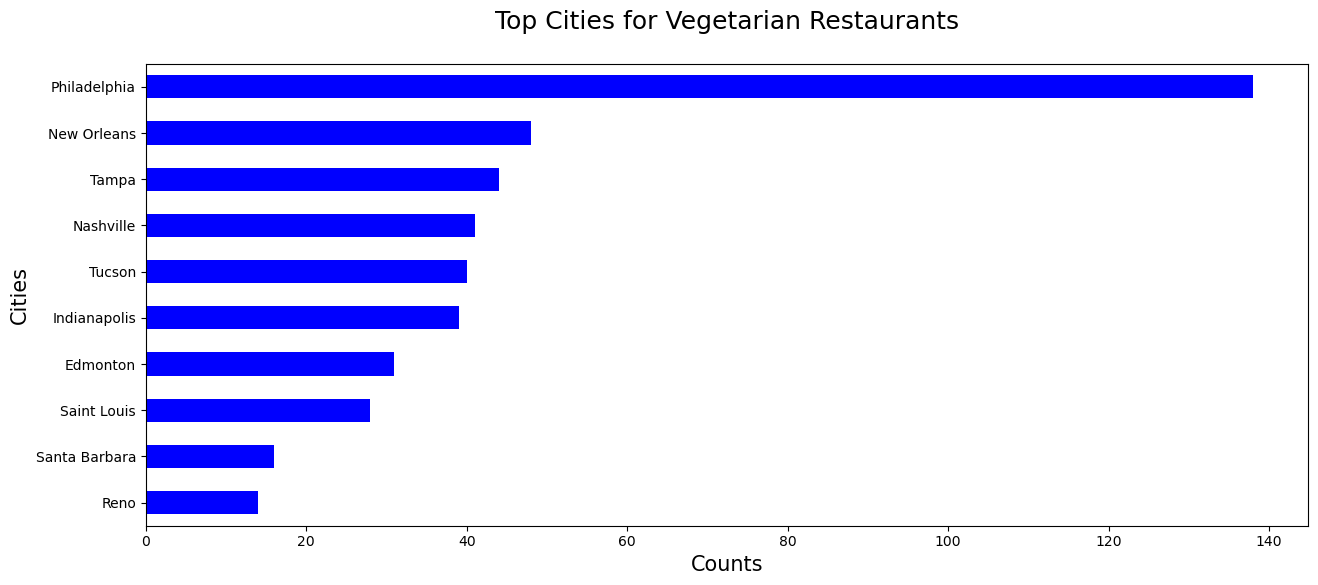

In [9]:
plt.figure(figsize=(15,6))
all_rest.join(from_business).groupby('city').sum()['Vegetarian'].sort_values(ascending=True).tail(10)\
                .plot(kind='barh',color='blue')
plt.title('Top Cities for Vegetarian Restaurants',fontsize=18, pad=25.0) 
plt.xlabel('Counts', fontsize=15)
plt.ylabel('Cities', fontsize=15)
plt.show()

The plot above indicates that the most vegetarian restaurants are located in Philadelphia, with a total of 138 restaurants. At the bottom of the top 10 cities plot for vegetarian restaurants is Peno, which has about 17 vegetarian restaurants